In [1]:
#importing the necessary libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import math

In [2]:
#set the working directory
os.chdir('E:/documents')
os.getcwd()

'E:\\documents'

In [3]:
# Reading the datasets into the jupyter notebook
df=pd.read_csv('titanic train.csv')
df1=pd.read_csv('titanic test.csv')

In [4]:
copy=df.copy()

# Exploratory data analysis

In [5]:
df.shape

(891, 12)

In [6]:
#check for duplicate elements
df.duplicated().sum()

0

In [7]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
#check the data types of the variables
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [10]:
for i in df.columns:
    print('num of unique values in {} : {}'.format(i,df[i].nunique()))

num of unique values in PassengerId : 891
num of unique values in Survived : 2
num of unique values in Pclass : 3
num of unique values in Name : 891
num of unique values in Sex : 2
num of unique values in Age : 88
num of unique values in SibSp : 7
num of unique values in Parch : 7
num of unique values in Ticket : 681
num of unique values in Fare : 248
num of unique values in Cabin : 147
num of unique values in Embarked : 3


In [11]:
# convert to the proper datatypes
df['Survived']=df['Survived'].astype('object')
df['Pclass']=df['Pclass'].astype('object')
df['SibSp']=df['SibSp'].astype('object')
df['Parch']=df['Parch'].astype('object')
df['Embarked']=df['Embarked'].astype('object')

In [12]:
# check the distribution
df.describe()

,PassengerId,Age,Fare
count,891.000000,714.000000,891.000000
mean,446.000000,29.699118,32.204208
std,257.353842,14.526497,49.693429
min,1.000000,0.420000,0.000000
25%,223.500000,20.125000,7.910400
50%,446.000000,28.000000,14.454200
75%,668.500000,38.000000,31.000000
max,891.000000,80.000000,512.329200


# Missing value analysis

''

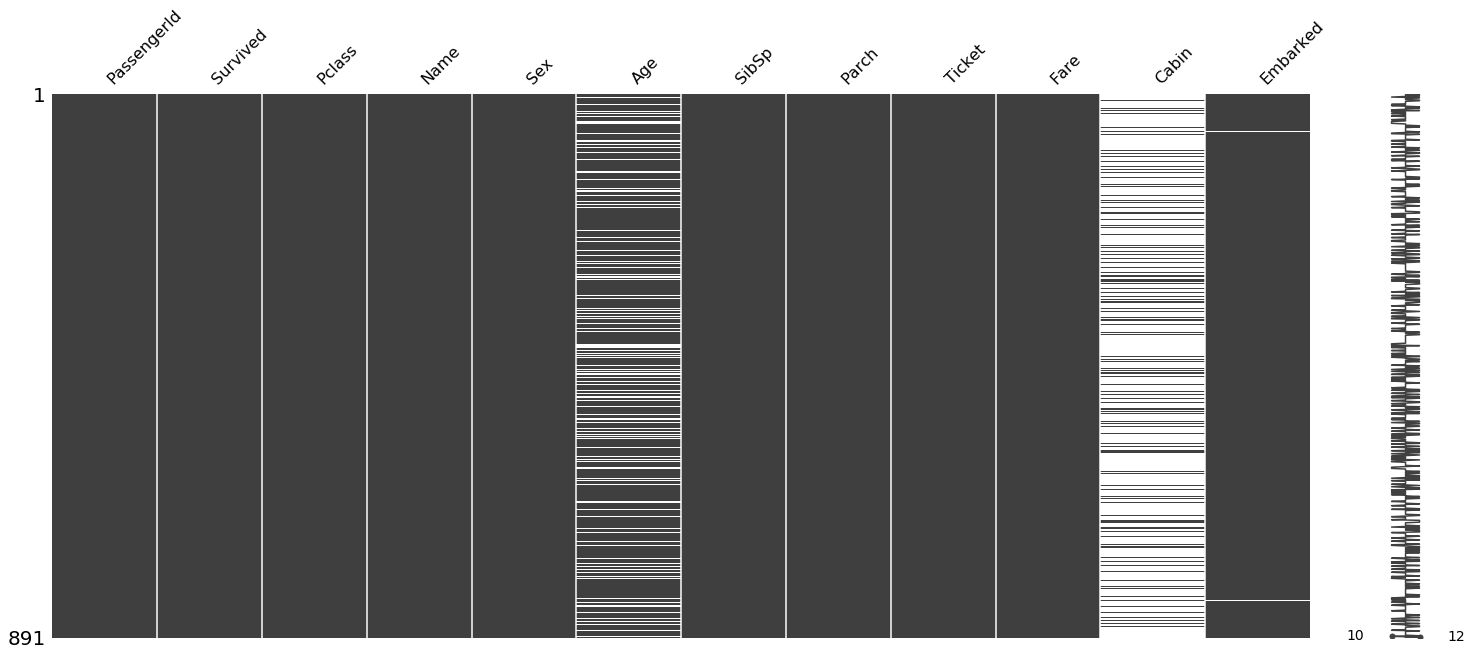

In [13]:
# Visualize the missing values
import missingno
missingno.matrix(df)
;

you can observe 'Age' and the 'cabin' variables have missing values. we have to deal with missing values by exploring more about the data

In [14]:
# Finding the number of missing values in each variable
miss=df.isna().sum()

In [15]:
miss=miss.to_dict()

In [16]:
miss

{'PassengerId': 0,
 'Survived': 0,
 'Pclass': 0,
 'Name': 0,
 'Sex': 0,
 'Age': 177,
 'SibSp': 0,
 'Parch': 0,
 'Ticket': 0,
 'Fare': 0,
 'Cabin': 687,
 'Embarked': 2}

# Seperate the data based on datatype

In [18]:
# seperate the numerical variable with categorical variables
df_num= df.select_dtypes(exclude=['object'])
df_num_col=df_num.columns

In [19]:
df_num.head(5)

,PassengerId,Age,Fare
0,1,22.0,7.2500
1,2,38.0,71.2833
2,3,26.0,7.9250
3,4,35.0,53.1000
4,5,35.0,8.0500


In [20]:
# seperate the categorical variables with the numerical variables
df_cat=df.select_dtypes(include=['object'])
df_cat_col=df_cat.columns

In [21]:
df_cat.head(5)

,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,C123,S
4,0,3,"Allen, Mr. William Henry",male,0,0,373450,NaN,S


# Outliers 

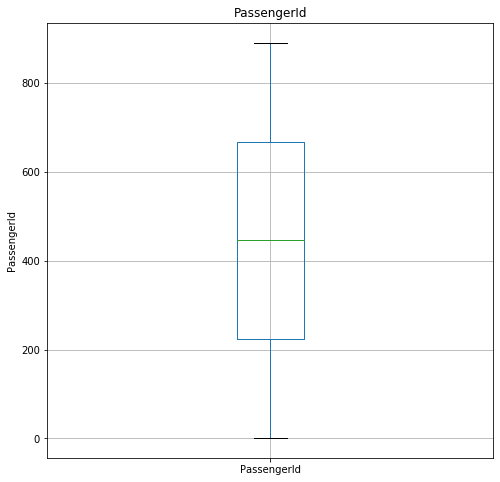

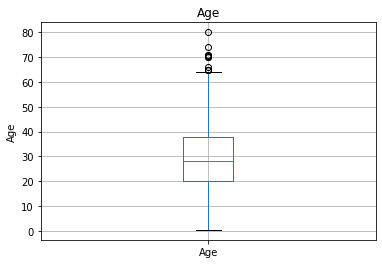

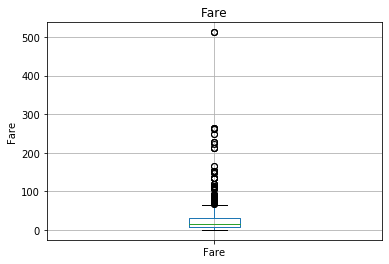

In [22]:
#check for outliers in the continuous variables so that we can get rid of the noisy data
plt.figure(figsize=(8,8))
for feature in df_num_col:
    df_num.boxplot(feature)
    plt.title(feature)
    plt.ylabel(feature)
    plt.show()
# we can observe outliers in some of the variables 
# first we have to deal with outliers in the Variables
# Age, fare variables have outliers to deal with

In [36]:
len(df[df['Age']>64])

11

In [23]:
df.describe()

,PassengerId,Age,Fare
count,891.000000,714.000000,891.000000
mean,446.000000,29.699118,32.204208
std,257.353842,14.526497,49.693429
min,1.000000,0.420000,0.000000
25%,223.500000,20.125000,7.910400
50%,446.000000,28.000000,14.454200
75%,668.500000,38.000000,31.000000
max,891.000000,80.000000,512.329200


In [31]:
def outliers(variable):
    low=0.01
    high=0.99
    new=df.quantile([low,high])
    l=new[variable][low]
    print('low-{}'.format(l))
    h=new[variable][high]
    print('high-{}'.format(h))
    lc=len(df[df[variable]<=l])
    hc=len(df[df[variable]>=h])
    t=len(df)
    print('percentage of outliers-{}'.format(((lc+hc)/t)*100))
    #assigning the higher and the lower values in the place of outliers
    df.loc[df[variable]<l,variable]=l
    df.loc[df[variable]>h,variable]=h
    print('Outliers are removed from {}'.format(variable))

In [28]:
df_num_col

Index(['PassengerId', 'Age', 'Fare'], dtype='object')

In [32]:
outliers('Age')

low-1.0
high-65.87
percentage of outliers-2.4691358024691357
Outliers are removed from Age


In [33]:
outliers('Fare')

low-0.0
high-249.00622000000033
percentage of outliers-2.6936026936026933
Outliers are removed from Fare


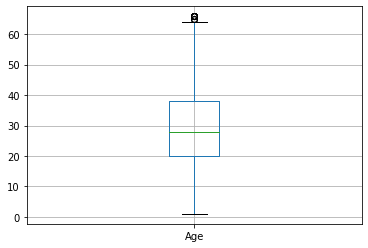

In [34]:
df.boxplot('Age')

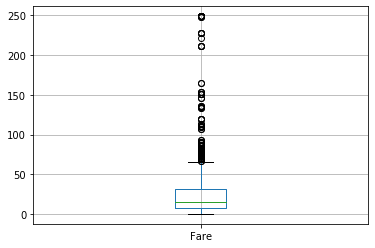

In [35]:
df.boxplot('Fare')

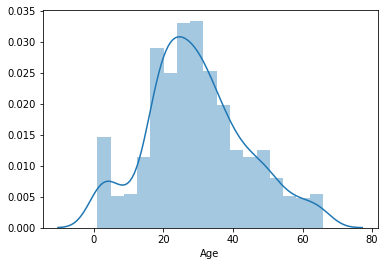

In [37]:
# observe the distribution and the outliers using dist plot.
sns.distplot(df['Age'].dropna())

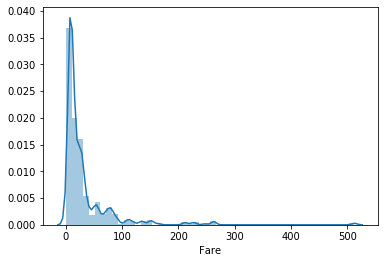

In [19]:
sns.distplot(df['Fare'])
# By using distplot we can also observe outliers in the variable.

# Lets explore each of the variable in detail so that it is easy to find the relation with the target variable

In [20]:
# take passenger id column
print('num of unique values : {}'.format(df['PassengerId'].nunique()))
print('lenght of passenger id column : {}'.format(len(df)))

num of unique values : 891
lenght of passenger id column : 891


It would not have any effect in the target variable so i am going to remove this variable

In [21]:
df=df.drop('PassengerId',axis=1)

0    549
1    342
Name: Survived, dtype: int64


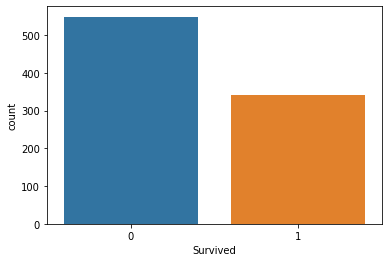

In [74]:
# Take Survived column and try to explore
sns.countplot(df['Survived'])
print(df['Survived'].value_counts())

In [38]:
549/(549+342)

0.6161616161616161

We can observe that 61.6 percent of people died in the titanic

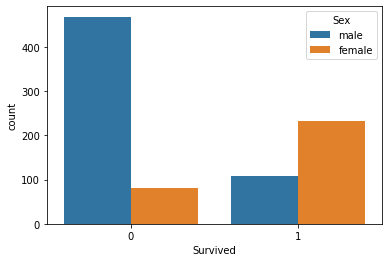

In [79]:
sns.countplot(x='Survived',hue='Sex',data=df)
# we can observe that the more females are survived compared to males

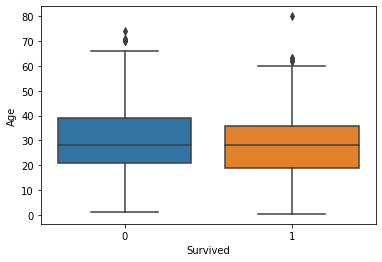

In [23]:
sns.boxplot(x='Survived',y='Age',data=df)
# we are comparing the age with each variable because to impute the missing values by using another variable

In [77]:
# take Pclass variable and explore it
df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

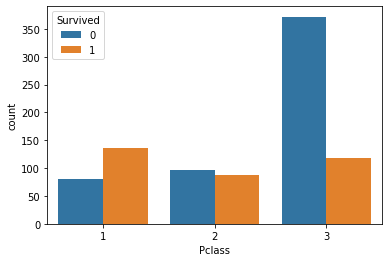

In [84]:
sns.countplot(x='Pclass',hue='Survived',data=df)
#We can observe that 1st class people have high survived rate than other classes

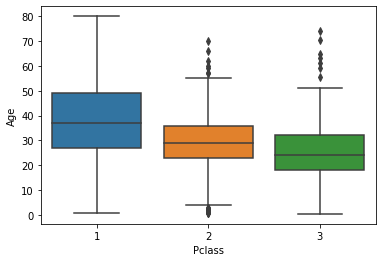

In [22]:
sns.boxplot(x='Pclass',y='Age',data=df)

we can see that the people with older age tends to occupy higher classes. There is a chance to impute the missing values in sex variable with Pclass variable.
check for other best possibilities by using other variables as well

In [92]:
#Next explore name column
df['Name'].nunique()
# target variable has no relation with the names so i am neglecting the name variable

891

In [89]:
df['Name'].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [39]:
df.drop('Name',axis=1,inplace=True)

In [95]:
df.dtypes

PassengerId      int64
Survived        object
Pclass          object
Name            object
Sex             object
Age            float64
SibSp           object
Parch           object
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [26]:
# Deal with Sex variable
df['Sex'].isna().sum()

0

male      577
female    314
Name: Sex, dtype: int64
percentage of male in the ship : 64.75869809203144
Percentage of females in the ship : 35.24130190796858


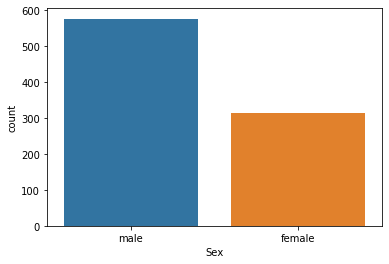

In [34]:
print(df['Sex'].value_counts())
sns.countplot(x='Sex',data=df)
print('percentage of male in the ship : {}'.format(577/(314+577)*100))
print('Percentage of females in the ship : {}'.format(314/(314+577)*100))
# We can see males are more compared to females

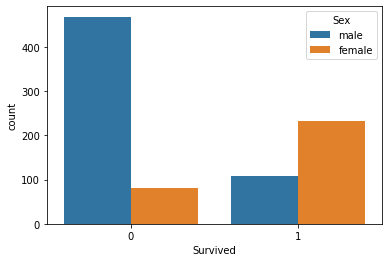

In [32]:
sns.countplot(x='Survived',hue='Sex',data=df)

In [37]:
print(df[df['Survived']==0]['Sex'].value_counts())

male      468
female     81
Name: Sex, dtype: int64


In [38]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [40]:
# Percentage of males and famels doesn't survived
print('percentage of males does not survived : {}'.format((468/577)*100 ))
print('percentage of females does not survived : {}'.format((81/314)*100))
# we can observe that males save lot of females in the ship 
# Death rate of males are much higher than females

percentage of males does not survived : 81.10918544194108
percentage of females does not survived : 25.796178343949045


In [42]:
# Lets explore about the Age variable
df['Age'].isna().sum()
print('percentage of missing values in the Age variable : {}'.format((177/len(df))*100))
# we have only 19% of missing values in the age variable
# we can impute this by using mean but we have seen the relationship of Age variable with the pclass.
# Lets try to impute the missing values by using the Pclass variable

percentage of missing values in the Age variable : 19.865319865319865


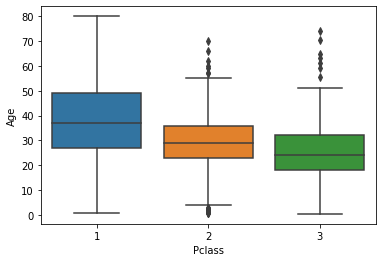

In [43]:
sns.boxplot(x='Pclass',y='Age',data=df)

In [47]:
print('Average age of people in the 1st class : {}'.format(df[df['Pclass']==1]['Age'].quantile(0.5)))
print('Average age of people in the 2nd class : {}'.format(df[df['Pclass']==2]['Age'].quantile(0.5)))
print('Average age of people in the 3rd class : {}'.format(df[df['Pclass']==3]['Age'].quantile(0.5)))

Average age of people in the 1st class : 37.0
Average age of people in the 2nd class : 29.0
Average age of people in the 3rd class : 24.0


In [40]:
# Impute the missing values with the Average age of people in Pclass
def impute_missing(data):
    age=data[0]
    pclass=data[1]
    
    if pd.isnull(age):
        if pclass==1:
            return 37
        elif pclass==2:
            return 29
        else:
            return 24
    else:
        return age

In [41]:
df['Age']=df[['Age','Pclass']].apply(impute_missing,axis=1)

In [42]:
df['Age'].isna().sum()

0

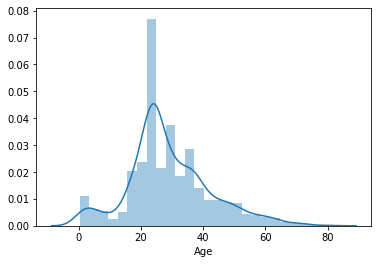

In [67]:
#observe the distribution of the Age variable
sns.distplot(df['Age'])

In [56]:
df.dtypes

Survived     object
Pclass       object
Sex          object
Age         float64
SibSp        object
Parch        object
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


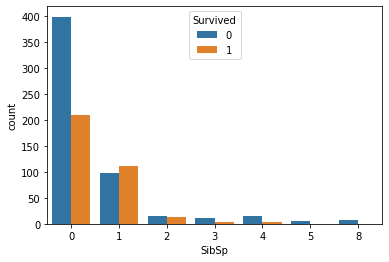

In [57]:
# Take SibSp variable and analyse
print(df['SibSp'].value_counts())
sns.countplot(x='SibSp',hue='Survived',data=df)
# We can observe that the people with 1 or 2 siblings have high survived rate

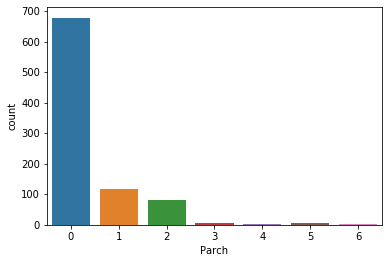

In [62]:
# Take Parch variable and analyse(num of parents/children aboard the titanic)
df['Parch'].value_counts()
sns.countplot(x='Parch',data=df)
# we can observe that the single are more in the titanic ship 

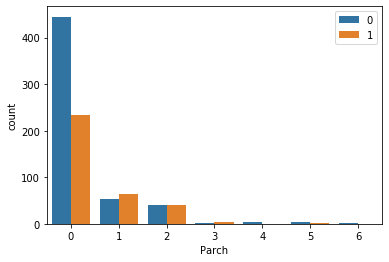

In [66]:
# campare with target variable
sns.countplot(x='Parch',hue='Survived',data=df)
plt.legend(loc='upper right')

In [68]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked'],
      dtype='object')

In [69]:
# Take Ticket variable
df['Ticket'].value_counts()
# We can see that there are lot of different unique tickets present.
# By observing the variable we can tell that we can't do anything with this variable

1601             7
CA. 2343         7
347082           7
347088           6
CA 2144          6
3101295          6
S.O.C. 14879     5
382652           5
17421            4
19950            4
PC 17757         4
W./C. 6608       4
LINE             4
349909           4
113760           4
113781           4
4133             4
2666             4
347077           4
PC 17572         3
13502            3
371110           3
C.A. 31921       3
SC/Paris 2123    3
347742           3
363291           3
230080           3
248727           3
C.A. 34651       3
345773           3
                ..
250651           1
113787           1
315084           1
PC 17599         1
113800           1
234360           1
312993           1
349249           1
350048           1
367228           1
348121           1
229236           1
347078           1
374887           1
330932           1
330919           1
3101296          1
12460            1
PC 17482         1
347089           1
11769            1
233639      

In [43]:
df.drop('Ticket',axis=1,inplace=True)

In [70]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked'],
      dtype='object')

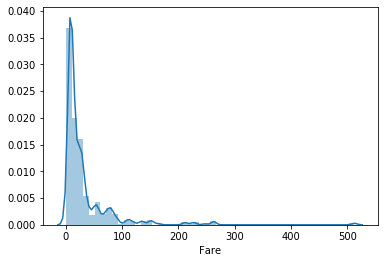

In [72]:
# Take Fare variable
sns.distplot(df['Fare'])
# It is a skewed distribution because most of the fare lies in between 0-50

In [45]:
# Take Cabin variable
print('number of missing values in cabin variable : {}'.format(df['Cabin'].isna().sum()))
print('percentage of missing values in the cabin variable : {}'.format((687/len(df))*100))
# We can't deal with the variable having 77% missing values because it might mislead the classification model

number of missing values in cabin variable : 687
percentage of missing values in the cabin variable : 77.10437710437711


In [46]:
df.drop('Cabin',axis=1,inplace=True)

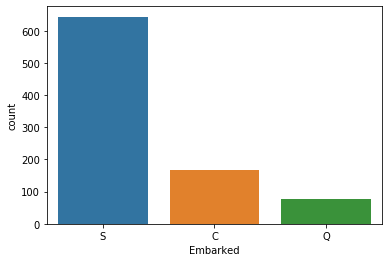

In [78]:
# Take the Embarked variable
df['Embarked'].value_counts()
sns.countplot(x='Embarked',data=df)
# we can see that most of the people aboard the ship in Southampton

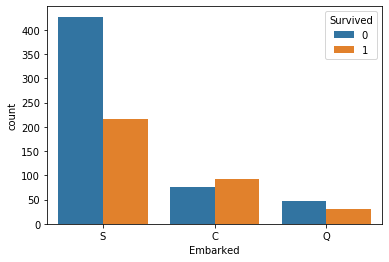

In [79]:
sns.countplot(x='Embarked',hue='Survived',data=df)

In [50]:
df.drop('PassengerId',axis=1,inplace=True)

In [51]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [52]:
df.dtypes

Survived     object
Pclass       object
Sex          object
Age         float64
SibSp        object
Parch        object
Fare        float64
Embarked     object
dtype: object

# one hot encoding for categorical variables

In [53]:
df=pd.get_dummies(df,drop_first=True)

In [54]:
df.head()

,Age,Fare,Survived_1,Pclass_2,Pclass_3,Sex_male,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_Q,Embarked_S
0,22.0,7.2500,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1
1,38.0,71.2833,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,26.0,7.9250,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,35.0,53.1000,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
4,35.0,8.0500,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [55]:
df.shape

(891, 20)

In [60]:
x=df.drop('Survived_1',axis=1)
y=df['Survived_1']

# Split the data into train and test

In [61]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=3)

# Model Selection

In [74]:
# Logistic regression
from sklearn.linear_model import LogisticRegression

In [75]:
LR_model=LogisticRegression()

In [76]:
LR_model.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [77]:
LR_pred=LR_model.predict(x_test)

In [81]:
accuracy_score(y_test,LR_pred)

0.7937219730941704

Logistic Regression gave me the best accuracy